<a href="https://colab.research.google.com/github/AlexeyTri/MLScratch/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Логистическая регрессия

**Задача:** классификация


In [ ]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import PolynomialFeatures

import sympy

$z = 𝑋ϴ ⟶ h_θ(x) = \frac{1}{1+e^{-𝑋Θ}}$

In [ ]:
def h(x, theta):
    z = np.dot(x, theta)
    return 1/1+np.exp(-z)

$
\begin{cases}
y = 1, h_ϴ(x) > 0,5 \\
y = 0, h_ϴ(x) < 0,5
\end{cases}
$

*Уравнение решающей границы:*

9$x2 = m*x1 + c$, где:

m - наклон прямой
c - сдвиг

$x2 = -\frac{ϴ_1}{ϴ_2}*x1 - \frac{ϴ_0}{ϴ_2}$


In [ ]:
def stable_sigmoid(z):
    if z>=0:
        return 1/(1+np.exp(-z))
    else:
        return(np.exp(z)/(1+np.exp(z)))

In [ ]:
def H(x, theta):
    z = np.dot(x, theta)

    return np.array([stable_sigmoid(value) for value in z])

In [ ]:
theta = np.array([-3, 1, 1])
x = np.arange(1, 13).reshape(4, 3)

h(x, theta)

array([   1.13533528,    3.71828183,   55.59815003, 1097.63315843])

## Logistic loss

$J_ϴ = - \frac{1}{n}∑ y*(log(h_ϴ(x)|y=1) + (1-y)*(log(1-h_ϴ(x)|y=0))$




In [ ]:
output = pd.DataFrame({
    "y": [1, 1, 1, 0, 0, 1, 1, 0],
    "y_pred": [0.82, 0.7, 0.93, 0.11, 0.7, 0.2, 0.3, 0.1]
})

output

,y,y_pred
0,1,0.82
1,1,0.70
2,1,0.93
3,0,0.11
4,0,0.70
5,1,0.20
6,1,0.30
7,0,0.10


In [ ]:
output["y=1 pred"] = np.where(output["y"] == 1, output["y_pred"], 1 - output["y_pred"])

output

,y,y_pred,y=1 pred
0,1,0.82,0.82
1,1,0.70,0.70
2,1,0.93,0.93
3,0,0.11,0.89
4,0,0.70,0.30
5,1,0.20,0.20
6,1,0.30,0.30
7,0,0.10,0.90


In [ ]:
output["-log"] = -np.log(output["y=1 pred"])
output

,y,y_pred,y=1 pred,-log
0,1,0.82,0.82,0.198451
1,1,0.70,0.70,0.356675
2,1,0.93,0.93,0.072571
3,0,0.11,0.89,0.116534
4,0,0.70,0.30,1.203973
5,1,0.20,0.20,1.609438
6,1,0.30,0.30,1.203973
7,0,0.10,0.90,0.105361


<ipython-input-12-f2e115b9a605>:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(x_var, -np.log(x_var), c='b', label="-log(x)")


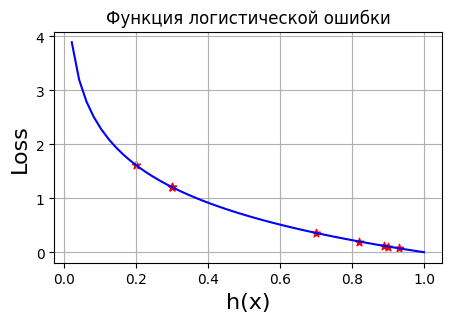

In [ ]:
plt.figure(figsize=(5, 3))

x_var = np.linspace(0, 1)

plt.plot(x_var, -np.log(x_var), c='b', label="-log(x)")
plt.scatter(output["y=1 pred"], [output["-log"]], marker="*", c='r')

plt.xlabel("h(x)", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.title("Функция логистической ошибки")
plt.grid()

plt.show()

In [ ]:
output['-log'].mean()

np.float64(0.6083718035621446)

In [ ]:
def objective(y, y_pred):

  # рассчитаем функцию потерь для y = 1, добавив 1e-9, чтобы избежать ошибки при log(0)
  y_one_loss = y * np.log(y_pred + 1e-9)

  # также рассчитаем функцию потерь для y = 0
  y_zero_loss = (1 - y) * np.log(1 - y_pred + 1e-9)

  # сложим и разделим на количество наблюдений
  return -np.mean(y_zero_loss + y_one_loss)

In [ ]:
objective(output['y'], output['y_pred'])

np.float64(0.6083718013590538)

In [ ]:
def gradient(x, y, y_pred, n):
    return np.dot(x.T, (y_pred - y)) * (1/n)

In [ ]:
from sympy import *

In [ ]:
x, y, theta = symbols('x y theta')

Loss = y * log(1/(1 + exp(-(x * theta)))) + (1-y) * log(1 - (1/(1+exp(-(x * theta)))))

diff(Loss, theta).simplify()

x*(y + (y - 1)*exp(theta*x))/(exp(theta*x) + 1)

In [ ]:
data = datasets.load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df = df[df['target'] != 2]
df['target'].unique()

array([0, 1])

In [ ]:
df.shape, np.unique(df.target)

((130, 14), array([0, 1]))

## Отбор признаков

In [ ]:
from scipy import stats

columns, correletions, correletionsPears = [], [], []

for col in df.drop('target', axis=1).columns:
    columns.append(col)
    correletions.append(stats.pointbiserialr(df[col], df['target'])[0])
    correletionsPears.append(stats.pearsonr(df[col], df['target'])[0])

pd.DataFrame({'columns': columns, 'correlation': correletions, 'corrPearson': correletionsPears}).style.background_gradient()

,columns,correlation,corrPearson
0,alcohol,-0.824399,-0.824399
1,malic_acid,-0.044302,-0.044302
2,ash,-0.354548,-0.354548
3,alcalinity_of_ash,0.470437,0.470437
4,magnesium,-0.383085,-0.383085
5,total_phenols,-0.532692,-0.532692
6,flavanoids,-0.610730,-0.610730
7,nonflavanoid_phenols,0.337489,0.337489
8,proanthocyanins,-0.249205,-0.249205
9,color_intensity,-0.750613,-0.750613


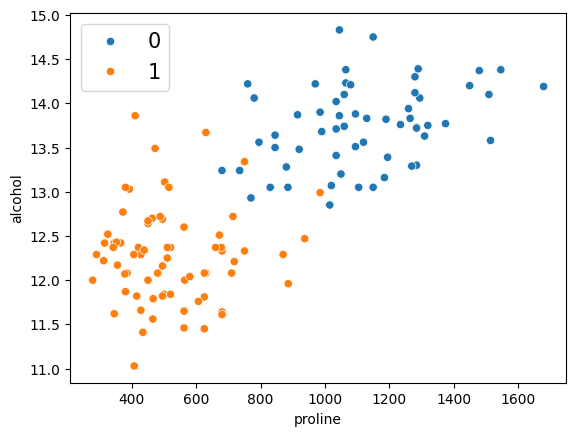

In [ ]:
sns.scatterplot(x=df.proline, y=df.alcohol, hue=df.target)
plt.legend(loc='upper left', prop={'size': 15})
plt.show()

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
X = df[['alcohol', 'proline']]
y = df['target']

In [ ]:
X = (X - X.mean())/X.std()
X.mean()

,0
alcohol,7.028566e-15
proline,-2.135044e-16


In [ ]:
def add_ones(x):
    return x.insert(0, 'x0', np.ones(x.shape[0]))

In [ ]:
add_ones(X)
X

,x0,alcohol,proline
0,1.0,1.446858,0.779851
1,1.0,0.287952,0.737300
2,1.0,0.242946,1.120264
3,1.0,1.604379,1.957113
4,1.0,0.332958,-0.156284
...,...,...,...
125,1.0,-0.983469,-1.169013
126,1.0,-0.578414,-1.242769
127,1.0,-1.298511,-0.919377
128,1.0,-0.645923,-1.271137


In [ ]:
theta, n = np.zeros(X.shape[1]), X.shape[0]
theta, n

(array([0., 0., 0.]), 130)

In [ ]:
loss_history = []

In [ ]:
# в цикле из 20000 итераций
for i in range(20000):
  # рассчитаем прогнозное значение с текущими весами
  y_pred = H(X, theta)
  # посчитаем уровень ошибки при текущем прогнозе
  loss_history.append(objective(y, y_pred))
  # рассчитаем градиент
  grad = gradient(X, y, y_pred, n)
  # используем градиент для улучшения весов модели
  # коэффициент скорости обучения будет равен 0,001
  theta = theta - 0.001 * grad

In [ ]:
theta, loss_history[-1]

(array([ 0.23234188, -1.73394252, -1.89350543]),
 np.float64(0.12282503517421262))

In [ ]:
def predict(x, theta):
    z = np.dot(x, theta)
    probs = np.array([stable_sigmoid(value) for value in z])

    return np.where(probs>=0.5, 1, 0), probs

In [ ]:
y_pred, probs = predict(X, theta)
y_pred[0], probs[0], y[0]

(np.int64(0), np.float64(0.022908352078195634), np.int64(0))

In [ ]:
accuracy_score(y, y_pred)

0.9615384615384616

In [ ]:
pd.DataFrame(confusion_matrix(y, y_pred),
             columns=['forecast 0', 'forecast 1'],
             index=['Actual 0', 'Actual 1'])

,forecast 0,forecast 1
Actual 0,57,2
Actual 1,3,68


In [ ]:
c, m = -theta[0]/theta[2], -theta[1]/theta[2]
c, m

(np.float64(0.12270462635312818), np.float64(-0.915731474695505))

In [ ]:
xmin, xmax = min(X['proline']), max(X['proline'])
ymin, ymax = min(X['alcohol']), max(X['alcohol'])

In [ ]:
yd = m*np.array([xmin, xmax]) + c
yd

array([ 1.452979  , -2.18902976])

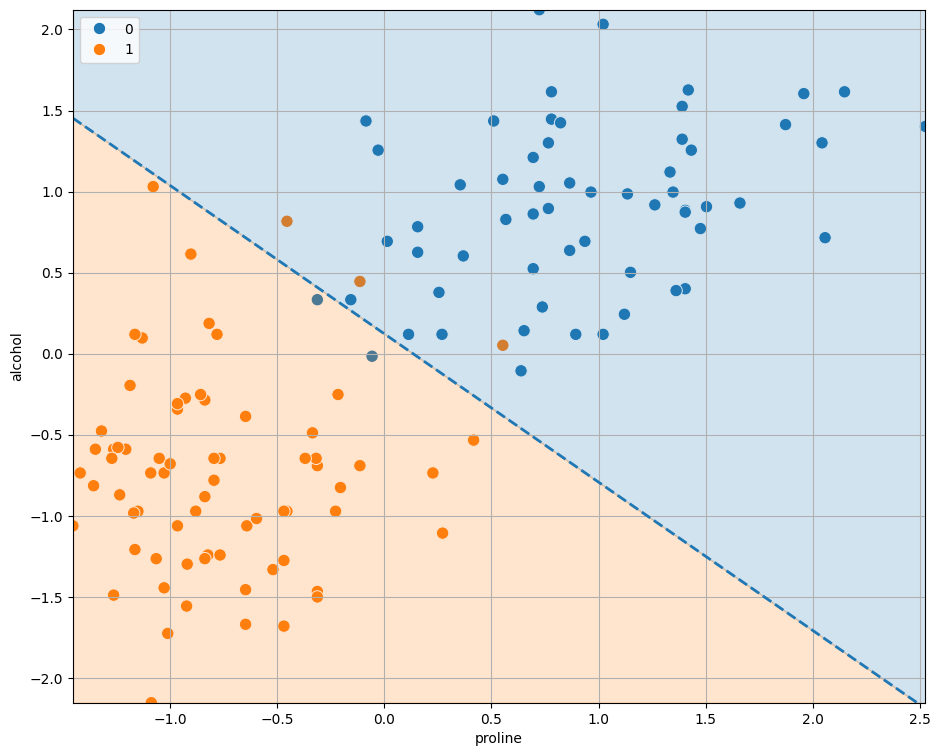

In [ ]:
plt.figure(figsize=(11,9))

sns.scatterplot(x = X['proline'], y = X['alcohol'], hue=y, s=80)

plt.plot(np.array([xmin, xmax]), yd, '--', lw=2)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.fill_between(np.array([xmin, xmax]), yd, ymax, color='tab:blue', alpha=0.2)
plt.fill_between(np.array([xmin, xmax]), yd, ymin, color='tab:orange', alpha=0.2)

plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
class LogReg():

    def __init__(self):

        self.theta = None
        self.loss_history = []

    def fit(self, x, y, iter=20000, lr=0.001):

        x, y = x.copy(), y.copy()

        #self.normalize(x)
        self.add_ones(x)

        theta = np.zeros(x.shape[1])
        n = x.shape[0]

        loss_history = []

        for i in range(iter):

            y_pred = self.H(x, theta)

            loss_history.append(self.objective(y, y_pred))
            grad = self.gradient(x, y, y_pred, n)

            theta -= lr * grad

            self.theta = theta
            self.loss_history = loss_history


    def predict(self, x):
        x = x.copy()
        self.add_ones(x)
        z = np.dot(x, self.theta)

        probs = np.array([self.stable_sigmoid(value) for value in z])

        return np.where(probs>=0.5, 1, 0), probs

    def H(self, x, theta):
        z = np.dot(x, theta)
        return np.array([self.stable_sigmoid(value) for value in z])

    def stable_sigmoid(self, z):
        if z >=0:
            return 1/(1 + np.exp(-z))
        else:
            return (np.exp(z))/(np.exp(z) + 1)

    def objective(self, y, y_pred):
        y_ones_class = y * np.log(y_pred + 1e-9)
        y_zero_class = (1-y) * np.log(1 - y_pred + 1e-9)

        return -np.mean(y_ones_class + y_zero_class)

    def gradient(self, x, y, y_pred, n):
        return np.dot(x.T, (y_pred - y)) / n

    def add_ones(self, x):
        return x.insert(0, "x0", np.ones(x.shape[0]))

In [ ]:
X = df[['alcohol', 'proline']]
y = df['target']

X = (X-X.mean())/X.std()

model = LogReg()
model.fit(X, y)

In [ ]:
model.theta, model.loss_history[-1]

(array([ 0.23234188, -1.73394252, -1.89350543]),
 np.float64(0.12282503517421262))

In [ ]:
y_pred, probs = model.predict(X)

y_pred[0], probs[0]

(np.int64(0), np.float64(0.022908352078195634))

In [ ]:
accuracy_score(y, y_pred)

0.9615384615384616

In [ ]:
pd.DataFrame(confusion_matrix(y, y_pred), columns=['forecast 0', 'forecast 1'], index=['actual 0', 'actual 1'])

,forecast 0,forecast 1
actual 0,57,2
actual 1,3,68
